In [1]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost.sklearn import XGBClassifier as XGBC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import f1_score, recall_score

In [25]:
raw_df = pd.read_csv('./Data/processed_feature_below_10.csv')

In [30]:
def get_feature(raw_df):
    features = []
    labels = []
    for i in range(len(raw_df['brand'])):
        feature = []
        feature.append(raw_df['brand'][i])
        feature.append(raw_df['days'][i])
        feature.append(raw_df['discount'][i])
        feature.append(raw_df['category'][i])
        feature.append(raw_df['sub_category'][i])
        feature.append(raw_df['price'][i])
        feature.append(raw_df['user_type'][i])
        feature.append(raw_df['user_city'][i])
        feature.append(raw_df['profit'][i])
        feature.append(raw_df['sell_num'][i])
        
        features.append(feature)
        labels.append(raw_df['label'][i])
    
    return features,labels

In [26]:
features,labels = get_feature(raw_df)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用 SMOTE 进行过采样
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [8]:
def train_xgboost(x_train,x_test,y_train,y_test):
    xgb_model = XGBC()
    xgb_model.fit(x_train,y_train)

    y_pred = xgb_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("XGBC ACC Score:", accuracy)
    y_pred_prob = xgb_model.predict_proba(x_test)[:, 1] 
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print("XGBC AUC Score:", auc_score)
    f1 = f1_score(y_test, y_pred)
    print("XGBC F1 Score:", f1)
    
    return xgb_model
    
    #print(xgb_model.feature_importances_)

In [9]:
def train_svc(x_train,x_test,y_train,y_test):
    svc_model = SVC(probability=True)
    svc_model.fit(x_train,y_train)

    y_pred = svc_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("SVC ACC Score:", accuracy)
    y_pred_prob = svc_model.predict_proba(x_test)[:, 1] 
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print("SVC AUC Score:", auc_score)
    f1 = f1_score(y_test, y_pred)
    print("SVC F1 Score:", f1)

In [10]:
def train_rf(x_train,x_test,y_train,y_test):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(x_train,y_train)

    y_pred = rf_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("RF ACC Score:", accuracy)
    y_pred_prob = rf_model.predict_proba(x_test)[:, 1] 
    auc_score = roc_auc_score(y_test, y_pred_prob)
    print("RF AUC Score:", auc_score)
    f1 = f1_score(y_test, y_pred)
    print("RF F1 Score:", f1)

In [27]:
print("original:")
train_svc(X_train,X_test,y_train,y_test)

print("\nstand:")
train_svc(X_train_scaled,X_test_scaled,y_train,y_test)

print("\nsmote:")
train_svc(X_resampled,X_test_scaled,y_resampled,y_test)

original:
SVC ACC Score: 0.7601078167115903
SVC AUC Score: 0.5033842846246794
SVC F1 Score: 0.8637059724349158

stand:


KeyboardInterrupt: 

In [28]:
print("original:")
train_xgboost(X_train,X_test,y_train,y_test)

print("\nstand:")
train_xgboost(X_train_scaled,X_test_scaled,y_train,y_test)

print("\nsmote:")
train_xgboost(X_resampled,X_test_scaled,y_resampled,y_test)

original:
XGBC ACC Score: 0.7947631882941856
XGBC AUC Score: 0.6802103102775894
XGBC F1 Score: 0.8778363511345404

stand:
XGBC ACC Score: 0.7947631882941856
XGBC AUC Score: 0.6803404125216905
XGBC F1 Score: 0.8778363511345404

smote:
XGBC ACC Score: 0.7901424720831729
XGBC AUC Score: 0.6889393577177465
XGBC F1 Score: 0.8738133827274832


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [13]:
print("original:")
train_rf(X_train,X_test,y_train,y_test)

print("\nstand:")
train_rf(X_train_scaled,X_test_scaled,y_train,y_test)

print("\nsmote:")
train_rf(X_resampled,X_test_scaled,y_resampled,y_test)

original:
RF ACC Score: 0.7439353099730458
RF AUC Score: 0.5971327091678174
RF F1 Score: 0.8468094909007141

stand:
RF ACC Score: 0.7447054293415479
RF AUC Score: 0.5975303341513512
RF F1 Score: 0.8473405480082893

smote:
RF ACC Score: 0.7339237581825183
RF AUC Score: 0.6023807084392447
RF F1 Score: 0.8369898560981363


In [35]:
dtrain = xgb.DMatrix(X_resampled, label=y_resampled)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# 设置XGBoost的参数
params = {
    'objective': 'binary:logistic',  # 二分类问题
    'eval_metric': 'logloss',  # 评估指标使用对数损失
    'max_depth': 3,  # 树的最大深度
    'eta': 0.1,  # 学习率
    'subsample': 0.8,  # 每棵树随机采样的比例
    'colsample_bytree': 0.8,  # 每棵树的特征随机采样的比例
    'seed': 42  # 随机种子，用于复现结果
}

# 训练模型
num_rounds = 100  # 迭代次数
model = xgb.train(params, dtrain, num_rounds)

# 在测试集上进行预测
y_pred_prob = model.predict(dtest)
y_pred = [1 if p > 0.5 else 0 for p in y_pred_prob]

# 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
accuracy

NameError: name 'xgb' is not defined

In [34]:
# 设置XGBoost的参数
param_grid = {
    'max_depth': [5, 7, 9],
    'learning_rate': [0.01,0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [50, 100, 200]
}

# 创建XGBoost分类器
xgb_model = XGBC()

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=2)
grid_search.fit(X_resampled, y_resampled)

# 输出最佳参数
print("Best Parameters:", grid_search.best_params_)

# 在测试集上评估最佳模型
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)
y_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]  # 获取正类别的概率
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC on the test set:", roc_auc)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
Accuracy on the test set: 0.8074701578744705
AUC on the test set: 0.7046841686710544


In [41]:
len(feature_importance_scores)

11

XGBC ACC Score: 0.7901424720831729
XGBC AUC Score: 0.6889393577177465
XGBC F1 Score: 0.8738133827274832


/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/suzyyy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


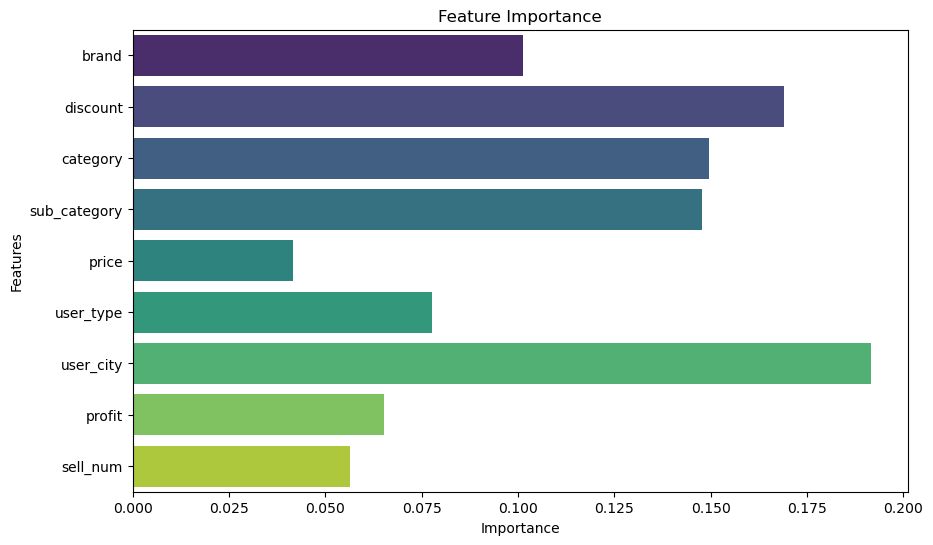

In [29]:
xgb_model = train_xgboost(X_resampled,X_test_scaled,y_resampled,y_test)
feature_importance_scores = xgb_model.feature_importances_
feature_names = []
for key in raw_df.keys():
    if key != 'label' and key != 'name':
        feature_names.append(key)
importance_df = pd.DataFrame({'Features': feature_names,
                              'Importance': feature_importance_scores})

# 使用seaborn和matplotlib可视化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=importance_df, orient='h', palette='viridis')
plt.title('Feature Importance')
plt.show()